In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize

In [2]:
status_table = pd.read_json('status_table.json')

In [3]:
status_table

,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,NumInO,NumInN,TotalOnIce,playDirection,zoneCat_team,closestOppTagId,dist_to_opp,closestOppx,closestOppy,playerId_y
0,0C14,2023-07-23 02:28:00.900,-6.704000,-13.859697,-0.047979,0.040309,0,0,0.062664,0.037776,...,0,11,11,,Neutral,None,NaN,NaN,NaN,None
1,0C14,2023-07-23 02:28:08.500,-6.950645,-13.570761,0.071154,0.013504,0,0,0.072424,0.033210,...,0,11,11,,Neutral,None,NaN,NaN,NaN,None
2,0D0D,2023-07-23 02:17:42.900,3.995246,-14.136486,0.041511,-0.097644,0,0,0.106102,0.011358,...,0,14,14,,Neutral,None,NaN,NaN,NaN,None
3,0D0D,2023-07-23 02:25:52.000,6.204925,-12.879238,0.136995,0.041376,79,1147,0.143107,0.021862,...,0,11,11,,Neutral,None,NaN,NaN,NaN,None
4,0D0D,2023-07-23 02:25:52.400,6.248061,-12.834854,0.023162,0.089923,0,0,0.092858,0.036077,...,0,11,11,,Neutral,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249241,DC29,2023-07-23 02:10:30.700,4.041884,-12.657361,-1.477677,-0.978261,0,0,1.772153,1.511773,...,2,1,5,offence,O,0D92,4.421535,1.181109,-9.286021,v
1249242,DC29,2023-07-23 02:10:31.000,3.642152,-12.902550,-1.087424,-0.698996,0,0,1.292705,1.512251,...,2,1,4,offence,O,0D92,4.528821,0.271390,-9.877954,v
1249243,DDAC,2023-07-23 01:53:44.600,19.229282,11.783621,-1.799239,-0.252548,0,0,1.816877,1.084741,...,4,1,5,offence,O,8FBA,5.867060,13.581705,10.193884,h
1249244,DDAC,2023-07-23 02:05:16.200,18.730782,-11.449865,0.768739,0.150155,0,0,0.783266,0.552524,...,3,1,4,offence,O,0C0D,5.517369,20.115069,-6.108975,h


## Shift: Average Speed



In [4]:


speed_result = status_table.groupby(['tagId', 'playerShiftNum'])['speed'].mean().reset_index()
speed_pivot_result = speed_result.pivot_table(index='tagId', columns='playerShiftNum', values='speed').reset_index()
speed_pivot_result = speed_pivot_result.set_index('tagId')
speed_transposed_result = speed_pivot_result.transpose()
speed_transposed_result


tagId,0C0D,0C14,0D0A,0D0D,0D1E,0D8B,0D92,0DAF,1221,1832,...,9013,911F,9633,9A0B,9D82,C208,DA16,DB9F,DC29,DDAC
playerShiftNum,,,,,,,,,,,,,,,,,,,,,
0,0.123737,0.159191,0.468870,0.094496,0.076997,0.130828,0.168780,0.099666,0.824658,0.076943,...,0.099692,0.171534,0.175077,0.117537,0.104663,1.179144,0.407533,0.106032,1.306949,0.119989
1,1.105452,1.349924,1.841769,1.327536,1.435573,1.161863,1.120534,0.860900,1.440321,1.208160,...,1.022972,1.478253,0.190460,0.509259,1.308350,1.437302,1.642781,0.678523,1.005909,1.394646
2,0.867385,1.241369,NaN,0.854999,1.092220,0.144133,0.499196,0.804553,0.908904,1.242117,...,1.229608,0.694957,0.228695,1.136291,1.582076,0.739269,0.141261,0.816025,1.239420,1.049436
3,0.876445,1.208576,NaN,1.512685,0.713675,0.948883,1.057753,1.052088,1.057230,1.302687,...,0.825872,0.779124,0.190115,0.797135,0.113207,0.245843,0.821048,0.560052,1.464834,0.956146
4,1.176073,1.447183,NaN,1.083146,1.029801,0.652463,1.209817,0.890944,0.737950,1.059327,...,1.018806,0.953042,0.210267,1.238320,0.700648,1.570228,1.601221,0.838513,0.965925,0.984181
5,1.691767,1.028909,NaN,1.655528,1.128711,1.060829,0.471372,0.786956,1.698791,1.759313,...,1.186685,0.415557,0.320126,1.000125,1.563989,1.677151,0.850438,0.866486,0.905136,0.858978
6,0.534743,1.532585,NaN,0.583942,1.530823,0.176494,1.374343,0.998292,0.471049,0.126218,...,1.841466,0.912514,0.191353,1.049410,0.323586,2.116881,1.123615,0.887051,0.808488,1.041655
7,1.934337,1.030021,NaN,0.167789,0.288293,0.133719,1.122523,0.202928,0.142310,0.989110,...,0.310214,0.210984,0.211513,0.871105,1.943541,1.084243,0.122560,0.965163,0.988767,0.745677
8,2.684747,1.036078,NaN,1.008344,0.135572,0.080005,0.852177,0.873448,1.105935,1.305770,...,0.195576,0.376552,0.178908,1.031594,0.387892,0.161294,0.125071,1.669043,2.335409,1.259422


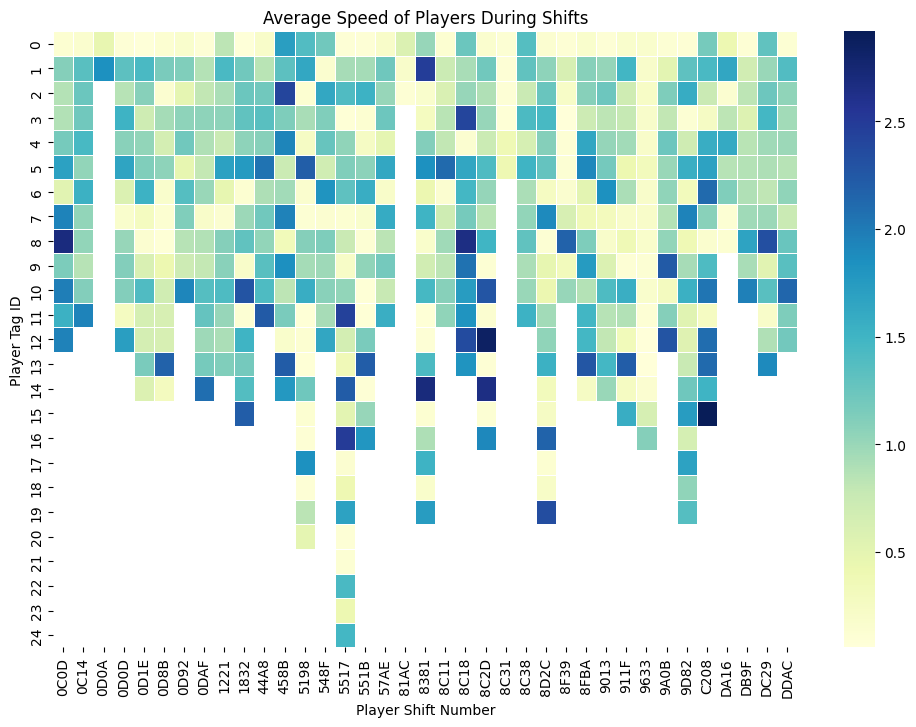

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

sns.heatmap(speed_transposed_result, cmap="YlGnBu", annot=False, fmt=".2f", linewidths=.5)

# Set plot labels and title
plt.xlabel('Player Shift Number')
plt.ylabel('Player Tag ID')
plt.title('Average Speed of Players During Shifts')

# Show the plot
plt.show()


## Shift: Max Speed



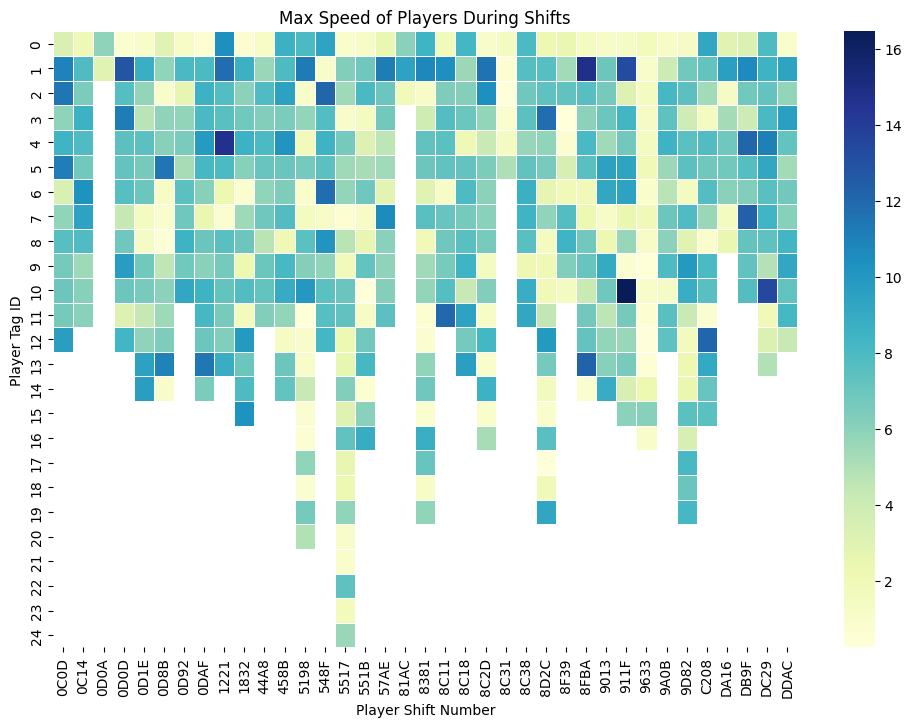

In [16]:
max_speed_per_shift = status_table.groupby(['tagId', 'playerShiftNum'])['speed'].max().reset_index()
max_speed_pivot = max_speed_per_shift.pivot_table(index='tagId', columns='playerShiftNum', values='speed').reset_index()
max_speed_pivot = max_speed_pivot.set_index('tagId')
max_speed_transposed = max_speed_pivot.transpose()

plt.figure(figsize=(12, 8))

sns.heatmap(max_speed_transposed, cmap="YlGnBu", annot=False, fmt=".2f", linewidths=.5)

# Set plot labels and title
plt.xlabel('Player Shift Number')
plt.ylabel('Player Tag ID')
plt.title('Max Speed of Players During Shifts')

# Show the plot
plt.show()


## Shift: Average Location



In [8]:


average_location_result = status_table.groupby(['tagId', 'playerShiftNum']).agg({
    'x': 'mean',
    'y': 'mean'
}).reset_index()

# Combine 'x' and 'y' into a single column 'xy'
average_location_result['xy'] = average_location_result['x'].astype(str) + ',' + average_location_result['y'].astype(str)

average_location_pivot_result = average_location_result.pivot(index='tagId', columns='playerShiftNum')['xy'].reset_index()

average_location_transposed_result = average_location_pivot_result.set_index('tagId').transpose()

average_location_transposed_result


tagId,0C0D,0C14,0D0A,0D0D,0D1E,0D8B,0D92,0DAF,1221,1832,...,9013,911F,9633,9A0B,9D82,C208,DA16,DB9F,DC29,DDAC
playerShiftNum,,,,,,,,,,,,,,,,,,,,,
0,"3.7416704464709065,-13.441668179880995","-4.8315379115659285,-13.399685514420444","-23.933173030214288,-1.8098044695088047","5.343798644505758,-13.962934484987272","7.319179893331665,-13.321736907512367","5.688411170784161,-13.359826239759999","-4.416669690001631,-13.434241442950748","7.347747232586469,-13.83085772530871","-4.33285116806477,-11.655028692996856","-7.1202046720058,-13.374393504986998",...,"6.85631264393545,-13.571925224418493","4.6849021503937145,-13.3177881279665","-8.860436582143631,-13.178853124086437","-7.829783608030243,-13.33146332008374","-7.078554588584114,-13.440195231273028","-3.405018956989486,-11.469428265216887","-3.299995482051143,-13.222295083308286","5.388837587108751,-13.914000070196824","3.3869312083174963,-8.511008337403528","-5.8047772029481335,-13.476198526945351"
1,"4.961676002397859,-11.21412641528695","-3.0805849663889386,-10.17666529307288","-2.359949750814286,-12.692073051971429","7.6509867288909446,-9.270150458989662","5.67076739697967,-5.774988114923277","10.47234606210729,-4.845411973944692","-2.8675991748445897,-9.927042928341306","9.277801479692984,-11.52154869477808","-3.399555193824123,-8.267661361276605","-7.853721226944626,-8.006419998890808",...,"6.041217819300675,-10.077037180532734","1.4539273321023523,-8.728848313511866","-8.857820343833197,-12.924828759132927","-6.444360066601536,-10.185393283556214","-4.127210960611284,-11.031381368732218","2.0314933443193897,-9.898082506120273","-1.4573892511628308,-6.994970210539183","4.164712850759667,-11.71592409797943","9.843161902238869,-8.401710834491393","-5.231007461699013,-9.719645426472393"
2,"4.16462461778828,-10.360545275891266","-2.9262885351026533,-7.944312271301215",NaN,"1.5606017199336286,-11.382134368208805","6.713269012255746,-6.931857294846995","4.4287363673155555,-13.082319629056208","-6.629782056254078,-10.928283542168442","7.797481631063359,-11.730941924498271","-2.92753626399233,-7.567819120952448","-7.020234711107389,-7.937994587834434",...,"7.595458498376193,-8.707684208648427","3.498795489573416,-12.619438126068594","-8.83704704044918,-12.879003004361664","-6.641101601418065,-7.1667053961389975","-6.172973429188625,-7.201860752428788","-7.564318815588837,-8.84462049047534","-5.423696738404402,-13.133255423740998","1.9454660190458486,-11.15088885382697","4.141406004595877,-8.217085490270225","-3.2167652793235133,-8.295890650489088"
3,"7.387613803806907,-9.186056031067043","0.7272456583065191,-9.252386051591758",NaN,"5.457646422673591,-7.5435649509535905","9.594889759646508,-9.742459645518865","3.97210920263583,-10.107883542293623","0.37670554199527456,-6.983152335538369","6.190757262669735,-9.319856027263631","-1.2055204155570374,-9.115300290699324","-2.6983479282788516,-8.288598096841769",...,"10.126375548623662,-10.323979494132056","4.570949086498469,-10.247496404569317","-8.937186266338426,-13.07500697144466","-8.666953984431222,-9.067458683554728","-7.519961622062274,-13.124735032655556","-4.26077218358785,-12.835406472787227","-3.7225313139724117,-8.816104071683027","7.215259588065449,-9.625989080986034","5.036565778127393,-8.833533667533","-2.4047690979938676,-11.18614033050564"
4,"4.888615090995453,-10.296946177842841","1.0982092007600464,-8.211781896484359",NaN,"6.449355419842424,-10.789029938367442","10.149240781927059,-7.5317119228566085","4.213308774975767,-12.509108379399352","-4.512586601161429,-8.73724504857744","10.008771295408426,-9.584533634306558","-2.0254089861834617,-10.274143566534503","-4.738887765801776,-10.4478396554126",...,"11.100828537077339,-10.417734780948942","5.988221155117242,-9.966972767075385","-8.84243436604226,-13.013495633774781","-4.38258417183327,-5.73118457345768","-8.4687901571308,-11.355390929295734","0.9638847626903685,-7.045542818776565","1.4970451012698127,-7.40645628103932","1.9802966937700959,-10.738027515556459","4.0885

## Shift: Average Displacement



In [9]:


displacement_result = status_table.groupby(['tagId', 'playerShiftNum'])['displacement'].mean().reset_index()
displacement_pivot_result = displacement_result.pivot_table(index='tagId', columns='playerShiftNum', values='displacement').reset_index()
displacement_pivot_result = displacement_pivot_result.set_index('tagId')
displacement_transposed_result = displacement_pivot_result.transpose()
displacement_transposed_result


tagId,0C0D,0C14,0D0A,0D0D,0D1E,0D8B,0D92,0DAF,1221,1832,...,9013,911F,9633,9A0B,9D82,C208,DA16,DB9F,DC29,DDAC
playerShiftNum,,,,,,,,,,,,,,,,,,,,,
0,0.012105,0.015730,0.048291,0.011166,0.007655,0.013655,0.017049,0.009914,0.082592,0.007857,...,0.009964,0.017461,0.018006,0.012213,0.010410,0.118193,0.041132,0.010476,0.131091,0.012208
1,0.111305,0.136611,0.185881,0.133582,0.144365,0.117178,0.112478,0.086630,0.144618,0.121582,...,0.102724,0.148246,0.019808,0.051129,0.131969,0.144509,0.165184,0.068090,0.101616,0.139780
2,0.087081,0.126561,NaN,0.086101,0.109677,0.014904,0.051181,0.080969,0.091076,0.125189,...,0.124028,0.071519,0.023853,0.114783,0.158930,0.074188,0.014517,0.082145,0.124795,0.105264
3,0.088242,0.121702,NaN,0.155540,0.071679,0.095408,0.106946,0.105807,0.106186,0.131387,...,0.083772,0.078382,0.019687,0.080884,0.011098,0.025531,0.082833,0.056220,0.147310,0.096011
4,0.118046,0.145164,NaN,0.109327,0.103337,0.065920,0.122153,0.089569,0.074269,0.106286,...,0.102624,0.096294,0.021761,0.124904,0.070693,0.158694,0.161441,0.084811,0.097743,0.098858
5,0.172764,0.104629,NaN,0.166650,0.113333,0.107616,0.047371,0.079168,0.170442,0.176595,...,0.119247,0.041786,0.033242,0.100577,0.157582,0.168762,0.085455,0.087313,0.093690,0.086630
6,0.055066,0.154931,NaN,0.063356,0.154574,0.018153,0.136703,0.100525,0.048336,0.012936,...,0.185106,0.091788,0.019891,0.106053,0.032629,0.212884,0.112911,0.089675,0.081514,0.104555
7,0.196106,0.094391,NaN,0.016933,0.029337,0.013518,0.111663,0.020842,0.014823,0.104125,...,0.031479,0.021527,0.022020,0.087467,0.195392,0.108977,0.012473,0.097974,0.097896,0.070745
8,0.249825,0.105702,NaN,0.099134,0.013699,0.008026,0.086167,0.087660,0.110930,0.169136,...,0.020194,0.037607,0.018448,0.102481,0.040525,0.016304,0.012617,0.169808,0.237512,0.126382


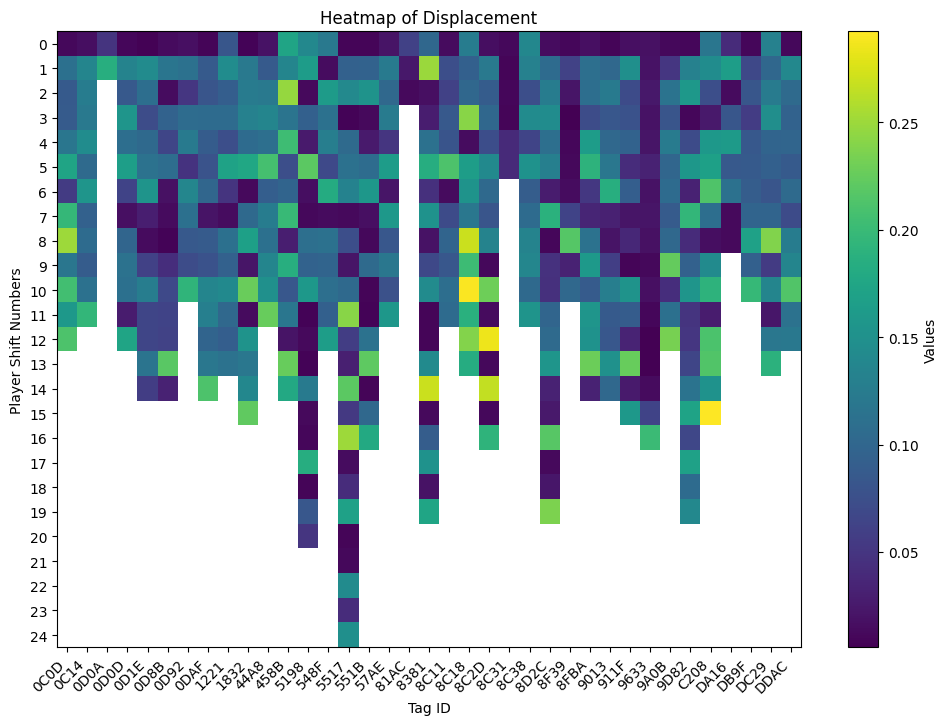

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.imshow(displacement_transposed_result.values, cmap='viridis', aspect='auto')


plt.colorbar(label='Values')
plt.title('Heatmap of Displacement')
plt.xlabel('Tag ID')
plt.ylabel('Player Shift Numbers')

plt.xticks(range(len(displacement_transposed_result.columns)), displacement_transposed_result.columns, rotation=45, ha='right')
plt.yticks(range(len(displacement_transposed_result.index)), displacement_transposed_result.index)


plt.show()


## Shift: Average Time on Ice



In [12]:
toi_pivot_result = status_table.groupby(['tagId', 'playerShiftNum'])['toi'].sum().groupby('tagId').cumsum().reset_index()
toi_pivot_result = toi_pivot_result.pivot_table(index='tagId', columns='playerShiftNum', values='toi').reset_index()
toi_transposed_result = toi_pivot_result.set_index('tagId').transpose()


In [13]:
toi_transposed_result

tagId,0C0D,0C14,0D0A,0D0D,0D1E,0D8B,0D92,0DAF,1221,1832,...,9013,911F,9633,9A0B,9D82,C208,DA16,DB9F,DC29,DDAC
playerShiftNum,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,20552078.7,0.0,0.0,0.0,0.0,0.0,155429.6,0.0,...,0.0,0.0,0.0,0.0,0.0,97851.5,0.0,0.0,94331.7,0.0
1,146428.5,177688.5,20578423.9,218570.1,143735.8,171567.9,231519.0,135709.2,628657.0,162907.2,...,127527.4,117923.0,25214.4,132404.1,64233.4,429971.5,107267.5,225262.0,483253.4,178969.2
2,979395.5,708594.7,NaN,941116.8,915096.0,259354.8,686107.4,486320.4,1525011.5,481186.7,...,800783.4,185042.2,98547.7,466144.0,358780.8,925493.8,279394.4,778822.7,1599033.6,691122.6
3,1978426.6,1476269.5,NaN,1373356.2,1995371.9,1164795.7,1504263.9,1246167.6,2874980.5,1441838.8,...,1582540.8,949774.0,302395.8,1041123.0,747391.2,1105914.3,988198.1,2019633.8,2705464.5,1994756.2
4,3031262.0,2578777.9,NaN,2240727.0,3226795.4,2218869.3,3160196.3,2316600.5,4720377.3,2792608.1,...,2704409.0,2304092.4,494631.4,1925014.5,1816255.1,2249915.2,1838738.5,3403165.4,4025494.7,3301195.4
5,3564994.9,4490904.3,NaN,3234491.7,5255160.5,3046350.9,5124186.3,3650084.8,5968910.4,3704165.5,...,4626624.5,3243988.7,752132.6,2865952.8,2714525.0,3500746.3,3857933.6,5094178.3,5304860.7,5050918.1
6,4055334.4,7464148.6,NaN,4269944.2,6149601.9,3590361.8,7653306.9,5257975.0,6272517.2,4331977.0,...,5333905.3,4753938.4,892816.7,3824426.6,2852525.5,4748130.7,5001998.0,7052672.5,8014298.9,7661694.5
7,4924785.4,10164367.9,NaN,4712511.6,6398159.2,3802344.7,11578059.3,6170113.4,7262571.5,4948796.5,...,5485469.2,5963771.9,1139962.8,8625812.5,3758015.0,6482572.7,7282879.9,9244711.3,10301664.5,10836052.0
8,6662993.5,12824519.4,NaN,7011452.7,7795418.7,4174093.7,14603904.8,8023543.9,9703870.9,5308665.0,...,7002169.8,8353807.8,1645048.2,12198849.9,4310566.4,6843791.0,19036189.3,10708766.2,11487286.8,12219347.9


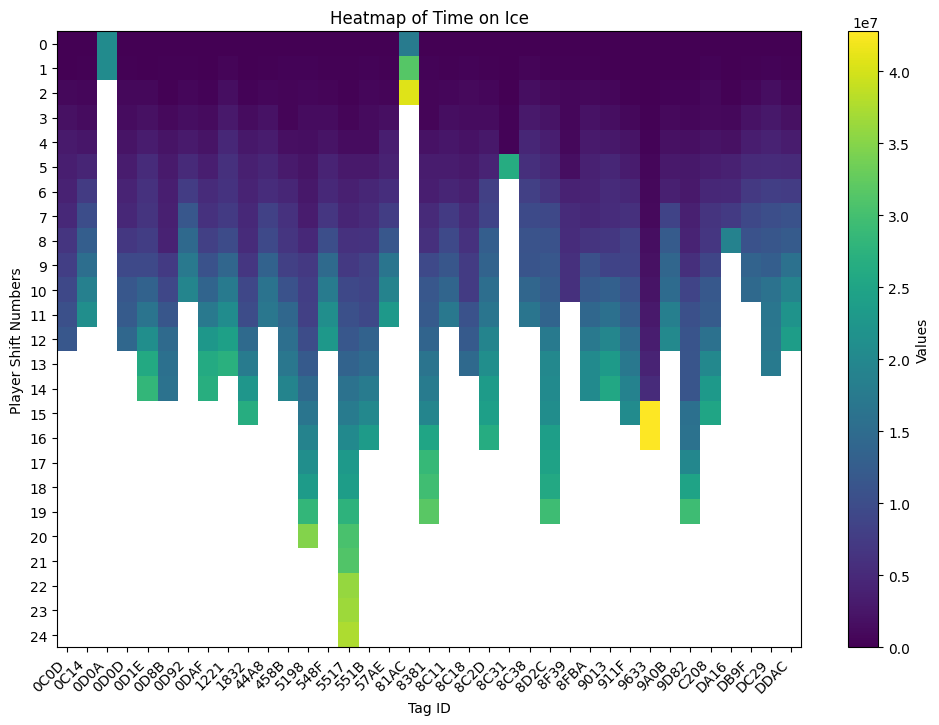

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(toi_transposed_result.values, cmap='viridis', aspect='auto')

# Customize the plot
plt.colorbar(label='Values')
plt.title('Heatmap of Time on Ice')
plt.xlabel('Tag ID')
plt.ylabel('Player Shift Numbers')


plt.xticks(range(len(toi_transposed_result.columns)), toi_transposed_result.columns, rotation=45, ha='right')
plt.yticks(range(len(toi_transposed_result.index)), toi_transposed_result.index)

# Show the plot
plt.show()


## Shift: Average Skating Angle



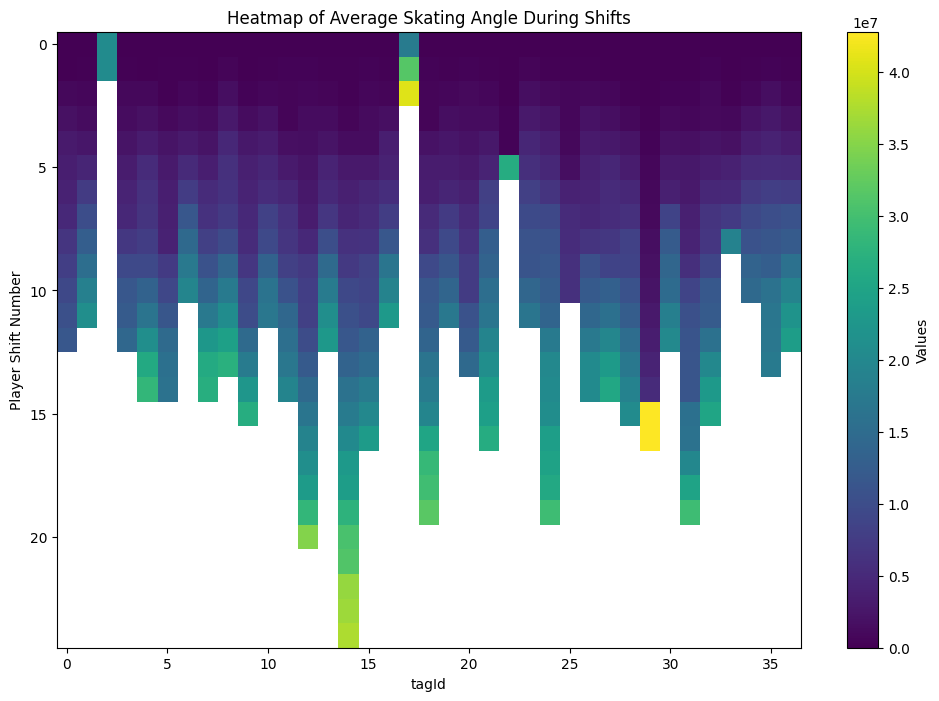

In [20]:

average_angle_per_shift = status_table.groupby(['tagId', 'playerShiftNum'])['skatingAngle'].mean().reset_index()

angle_pivot = average_angle_per_shift.pivot_table(index='tagId', columns='playerShiftNum', values='skatingAngle').reset_index()


angle_transposed = angle_pivot.set_index('tagId').transpose().reset_index()


plt.figure(figsize=(12, 8))
plt.imshow(toi_transposed_result.values, cmap='viridis', aspect='auto')



plt.colorbar(label='Values')
plt.title('Heatmap of Average Skating Angle During Shifts')
plt.xlabel('tagId')
plt.ylabel('Player Shift Number')

# Show the plot
plt.show()
